## British Airline Airways analysis by BELLO Ismaheel

Outline

- Introduction
- Data Gathering/Collection
- Data Analysis

### Introduction

In this project, we aim to gain insights into customer sentiments and opinions about British Airways by analyzing customer reviews from [Skytrax](https://airlinequality.com). By web scraping information from this popular platform, we will collect a diverse range of customer feedback on various aspects of their experiences with British Airways.

The dataset obtained from airlinequality.com includes several factors that customers rate, such as seat comfort, cabin staff service, food & beverages, ground service, value for money, inflight entertainment, and more. These factors, along with other relevant information such as the reviewer's name, rating, date published, country, trip details, and aircraft, will provide us with a comprehensive understanding of customer sentiments towards British Airways.

To ensure the accuracy and relevance of our analysis, we will perform data cleaning and preprocessing techniques on the gathered data. This step is crucial for handling missing values, standardizing formats, and removing any noise or inconsistencies that may affect the reliability of our findings.

The Report for this project can be found [here](https://github.com/Simplicity3317/BritishAirways/blob/fae9848863f69f341fcdf200debcb34fc9e985cc/presentation_slides.pdf)

### Data Gathering/Collection

In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Code to webscrape information from Airtrax

# Set the URL for scraping
url = 'https://www.airlinequality.com/airline-reviews/british-airways/page/1/?sortby=post_date%3ADesc&pagesize=100'

# Send a request to the URL and retrieve the content
req = requests.get(url).content

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(req, 'lxml')

# Extract the total number of pages for reviews
num_pages = soup.find('div', class_='pagination-total').get_text().split('of')[-1]
num_pages = int(re.findall(r'(\d+)', num_pages)[0])

# Define the number of reviews per page
rev_per_page = 100

# Calculate the total number of pages to scrape
num_pages = int(np.ceil(num_pages / rev_per_page))

# Find all review articles on the page
reviews = soup.find_all('article', attrs={'itemprop': 'review'})

# Initialize an empty DataFrame to store the scraped data
master_df = pd.DataFrame()

# Scrape the first page of reviews
print("Scraping page 1")
for j in range(2, num_pages + 2):
    for i in reviews:
        # Extract relevant information from each review
        name = i.find('span', attrs={'itemprop': 'name'})
        name = name.get_text() if name else None
        ratings = i.find('span', attrs={'itemprop': 'ratingValue'})
        ratings = ratings.get_text() if ratings else None
        best_ratings = i.find('span', attrs={'itemprop': 'bestRating'})
        best_ratings = best_ratings.get_text() if best_ratings else None
        date_published = i.find('time', attrs={'itemprop': 'datePublished'})
        date_published = date_published.get_text() if date_published else None
        country = i.find('h3', class_='text_sub_header userStatusWrapper').contents[2]
        country = country.text.strip(' () ') if country else None
        review = i.find('div', class_='text_content')
        review = review.get_text()

        # Create a DataFrame with the extracted information
        details = pd.DataFrame({'Name': [name], 'Rating': [ratings], 'Best_ratings': best_ratings,
                                'Date_published': date_published, 'Country': country, 'Review': review})

        # Extract additional details from the review table
        table = str(i.find_all('table')[0])
        df = pd.read_html(table)[0]
        df = df.set_index(0).transpose()
        df.reset_index(drop=True, inplace=True)

        # Extract ratings from the review table
        ratings = {}
        rows = i.find_all('tr')
        for row in rows:
            header = row.find(class_='review-rating-header')
            value = row.find(class_='review-rating-stars')
            if header and value:
                header_text = header.get_text(strip=True)
                star_rating = value.find_all('span', class_='star fill')
                numerical_rating = len(star_rating)
                ratings[header_text] = [numerical_rating]

        # Create a DataFrame with the extracted ratings
        df2 = pd.DataFrame(ratings)
        df[df2.columns] = df2[df2.columns].copy()

        # Combine the details and ratings DataFrames
        details = pd.concat([details, df], axis=1)

        # Append the details DataFrame to the master DataFrame
        master_df = pd.concat([master_df, details], axis=0, ignore_index=True)

    # Print the total number of reviews scraped after each page
    print(f"   ---> {master_df.shape[0]} total reviews")

    # Update the URL for the next page
    url = f'https://www.airlinequality.com/airline-reviews/british-airways/page/{j}/?sortby=post_date%3ADesc&pagesize={rev_per_page}'

    # Send a request to the next page URL and retrieve the content
    req = requests.get(url).content

    # Update the BeautifulSoup object with the new content
    soup = BeautifulSoup(req, 'lxml')

    # Find all review articles on the new page
    reviews = soup.find_all('article', attrs={'itemprop': 'review'})

    # Print the current page being scraped
    print(f"Scraping page {j}") if j < num_pages + 1 else None


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:

master_df.head()

,Name,Rating,Best_ratings,Date_published,Country,Review,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,Aircraft
0,N Beale,1,10,27th June 2023,United Kingdom,✅ Trip Verified | After travelling London to ...,Solo Leisure,Economy Class,London to Madrid,May 2023,3.0,3.0,3.0,1.0,1,no,NaN,NaN,NaN
1,T Casey,1,10,27th June 2023,United States,✅ Trip Verified | My luggage was mis-tagged i...,Family Leisure,Economy Class,London to Cairo,June 2023,1.0,1.0,NaN,1.0,1,no,NaN,NaN,NaN
2,Paige Boet,1,10,25th June 2023,United States,✅ Trip Verified | The airline lost my luggage...,Solo Leisure,Economy Class,New Orleans to London,June 2023,3.0,3.0,3.0,1.0,1,no,3.0,1.0,NaN
3,S Layne,1,10,25th June 2023,United States,✅ Trip Verified | We booked on the BA website...,Couple Leisure,Business Class,London to Amman,March 2023,NaN,NaN,NaN,NaN,1,no,NaN,NaN,NaN
4,E Lanewoski,2,10,25th June 2023,United Kingdom,✅ Trip Verified | First time flying with BA b...,Solo Leisure,Business Class,Heathrow to Bodrum,June 2023,1.0,1.0,1.0,1.0,1,no,NaN,NaN,A321 neo


In [4]:
master_df['Trip_Verified'] = master_df['Review'].apply(lambda x: 'Yes' if 'Trip Verified' in x else 'No')

In [5]:
# Remove the 'Trip Verified' and 'Not Verified' labels from the 'Review' column
master_df['Review'] = master_df['Review'].apply(lambda x: x.replace('✅ Trip Verified |', '') if 'Trip Verified' in x else x)
master_df['Review'] = master_df['Review'].apply(lambda x: x.replace('Not Verified', '') if 'Not Verified' in x else x)

In [6]:
#Saving dataframe as csv
master_df.to_csv('master_data.csv',index = False)

In [7]:
master_df.head()

,Name,Rating,Best_ratings,Date_published,Country,Review,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,Aircraft,Trip_Verified
0,N Beale,1,10,27th June 2023,United Kingdom,After travelling London to Madrid with Briti...,Solo Leisure,Economy Class,London to Madrid,May 2023,3.0,3.0,3.0,1.0,1,no,NaN,NaN,NaN,Yes
1,T Casey,1,10,27th June 2023,United States,My luggage was mis-tagged in Dallas on my wa...,Family Leisure,Economy Class,London to Cairo,June 2023,1.0,1.0,NaN,1.0,1,no,NaN,NaN,NaN,Yes
2,Paige Boet,1,10,25th June 2023,United States,The airline lost my luggage and was absolute...,Solo Leisure,Economy Class,New Orleans to London,June 2023,3.0,3.0,3.0,1.0,1,no,3.0,1.0,NaN,Yes
3,S Layne,1,10,25th June 2023,United States,"We booked on the BA website, round trip flig...",Couple Leisure,Business Class,London to Amman,March 2023,NaN,NaN,NaN,NaN,1,no,NaN,NaN,NaN,Yes
4,E Lanewoski,2,10,25th June 2023,United Kingdom,"First time flying with BA business class, ne...",Solo Leisure,Business Class,Heathrow to Bodrum,June 2023,1.0,1.0,1.0,1.0,1,no,NaN,NaN,A321 neo,Yes


In [8]:
#Checking the datatypes of the dataframe
master_df.dtypes

Name                       object
Rating                     object
Best_ratings               object
Date_published             object
Country                    object
Review                     object
Type Of Traveller          object
Seat Type                  object
Route                      object
Date Flown                 object
Seat Comfort              float64
Cabin Staff Service       float64
Food & Beverages          float64
Ground Service            float64
Value For Money             int64
Recommended                object
Inflight Entertainment    float64
Wifi & Connectivity       float64
Aircraft                   object
Trip_Verified              object
dtype: object

## 1. Top 5 Customer Origins for Review Submissions

In [9]:
top_5 = master_df.Country.value_counts().head(5)

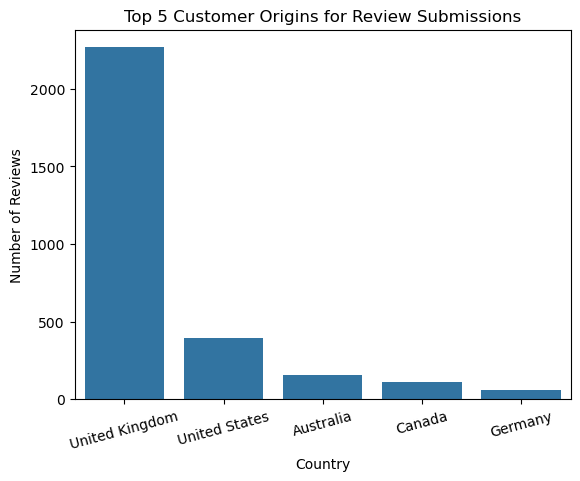

In [10]:
sns.barplot(x = top_5.index,y = top_5.values,color = sns.color_palette()[0]);
plt.xticks(rotation = 15);
plt.title('Top 5 Customer Origins for Review Submissions');
plt.xlabel('Country');
plt.ylabel('Number of Reviews');
plt.savefig('top5review.png')
plt.show()

### 2. Top 10 Aircraft with the best Average Rating.


In [11]:
# Filter out rows with missing values in the 'Rating' column
master = master_df[~master_df['Rating'].isnull()]
#Converting datatype to int
master['Rating'] = master['Rating'].astype(int)

C:\Users\Simplicity\AppData\Local\Temp\ipykernel_14580\161249936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master['Rating'] = master['Rating'].astype(int)


In [12]:
# Calculate the average rating for each aircraft and select the top 20 aircraft with highest average ratings
avg_rating_top = master.groupby('Aircraft')['Rating'].mean().sort_values(ascending=False).head(20)

In [13]:
avg_rating_top

Aircraft
Boeing 747 / A320             10.0
A319 / Boeing 777-300         10.0
A380 and Boeing 777           10.0
Boeing 747-400, A320, A319    10.0
A340-300, A320                10.0
Boeing 747 and Boeing 777     10.0
B737-400 / A380 / A319        10.0
B777-300ER / A320 / A380      10.0
Boeing 777-236 ER             10.0
B747 400                      10.0
A320, Boeing 777              10.0
B747-400 in retro             10.0
A319 / Boeing 787-9           10.0
Boeing 747-400 / A320         10.0
Saab 2000                     10.0
SAAB 2000                     10.0
Embraer170                     9.0
A320 neo                       9.0
A19                            9.0
777-300                        9.0
Name: Rating, dtype: float64

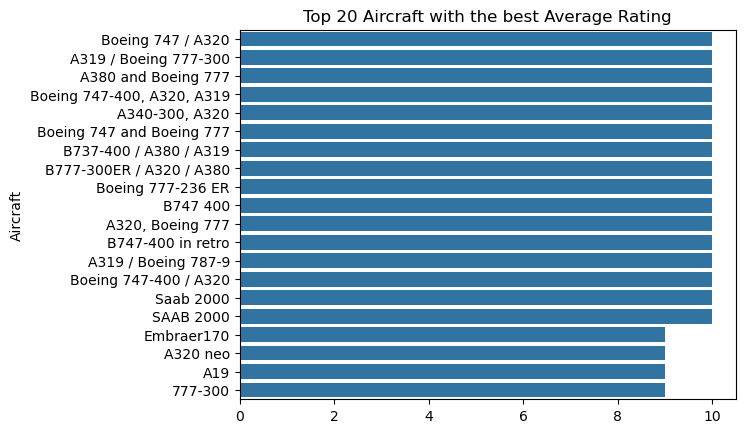

In [14]:
sns.barplot(y = avg_rating_top.index,x = avg_rating_top.values,color = sns.color_palette()[0])
plt.title('Top 20 Aircraft with the best Average Rating');
plt.savefig("top10bestr.png")
plt.show()

### 3. Top 20 Aircraft with the least Average Rating.

In [15]:
# Calculate the average rating for each aircraft and select the bottom 20 aircraft with lowest average ratings
avg_rating_least = master.groupby('Aircraft')['Rating'].mean().sort_values(ascending=True).head(20)

In [16]:
avg_rating_least

Aircraft
Boeing 777 200/300       1.0
Boeing 777               1.0
A319 / Boeing 789        1.0
Boieng 777-200           1.0
Dreamliner               1.0
Boeing 777 200           1.0
A380 and 747             1.0
Boeing 747-300           1.0
A322                     1.0
A230                     1.0
Boeing 747 & A319        1.0
Boeing 737-400           1.0
Boeing 737 800           1.0
777-200                  1.0
Various                  1.0
A320 / Boeing 777-200    1.0
B0eing 747-400           2.0
A320 / Boeing 777-300    2.0
A321Neo                  2.0
A321-neo                 2.0
Name: Rating, dtype: float64

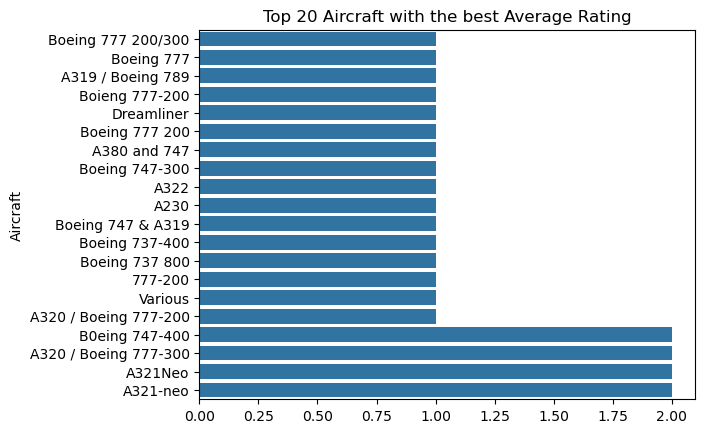

In [17]:
sns.barplot(y = avg_rating_least.index,x = avg_rating_least.values,color = sns.color_palette()[0]);
plt.title('Top 20 Aircraft with the best Average Rating');
plt.savefig("least10bestr.png")
plt.show()

### 4. Is there an association between the overall rating and specific factors (Seat Comfort, Cabin Staff Service, Food & Beverages, Ground Service, Value for Money, Inflight Entertainment, Wifi & Connectivity) of British Airways flights?

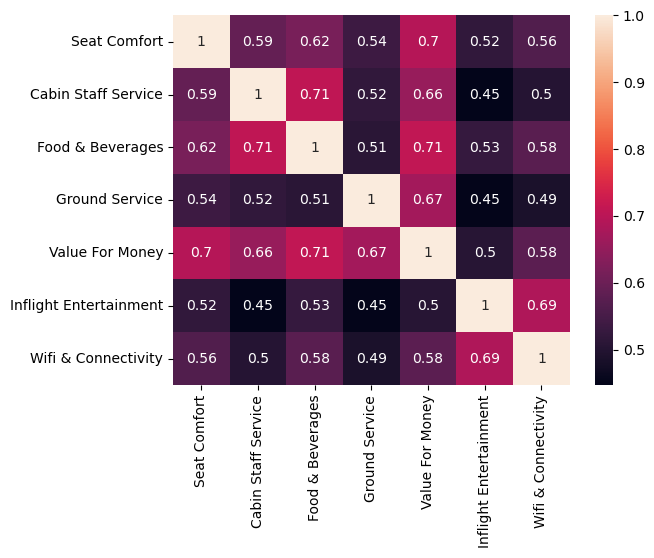

In [18]:
cols = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
           'Ground Service', 'Value For Money', 'Inflight Entertainment',
           'Wifi & Connectivity']
sns.heatmap(master_df[cols].corr(),annot = True)
plt.savefig('heatmap.png')

### 5. How do the ratings for different factors change over time for British Airways flights.

C:\Users\Simplicity\AppData\Local\Temp\ipykernel_14580\1456287142.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = master_df.groupby(pd.Grouper(key='Date Flown', freq='M')).mean()


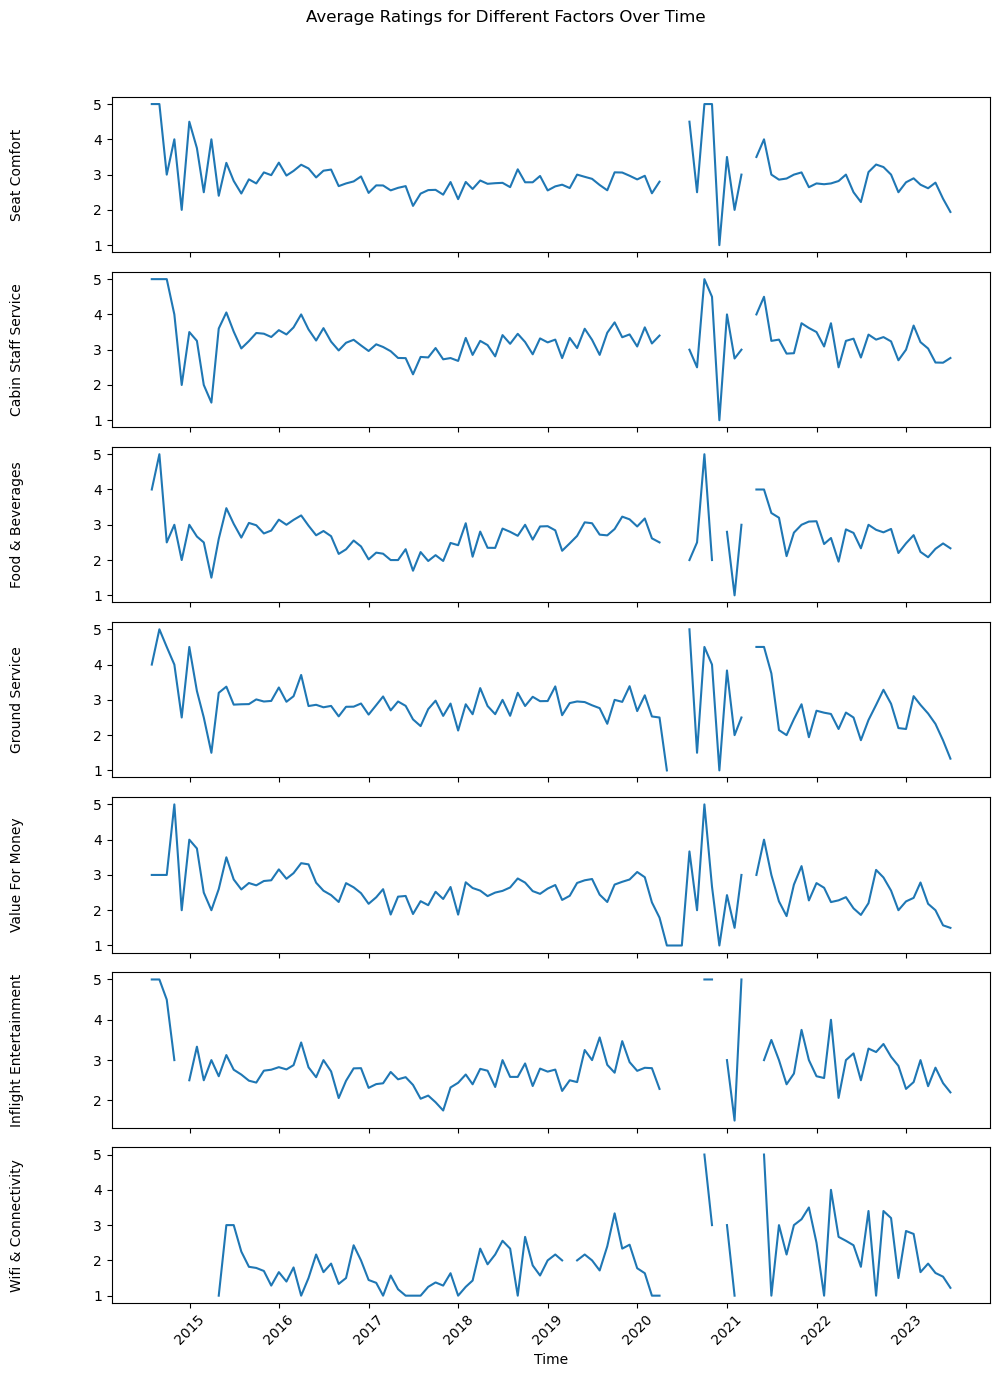

In [19]:
# Convert 'Date Flown' column to datetime format
master_df['Date Flown'] = pd.to_datetime(master_df['Date Flown'])

# Group the data by time intervals (e.g., months) and calculate average ratings
df_grouped = master_df.groupby(pd.Grouper(key='Date Flown', freq='M')).mean()

# Plotting the ratings over time for each factor
factors = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
           'Ground Service', 'Value For Money', 'Inflight Entertainment',
           'Wifi & Connectivity']

# Adjust figure size
fig, axs = plt.subplots(len(factors), 1, figsize=(10, 14), sharex=True)

# Iterate through factors and plot the ratings over time
for i, factor in enumerate(factors):
    axs[i].plot(df_grouped.index, df_grouped[factor])
    axs[i].set_ylabel(factor)
    axs[i].get_yaxis().set_label_coords(-0.1, 0.5)  # Adjust the position of ylabel

    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Set common x-axis label and title
plt.xlabel('Time')
plt.suptitle('Average Ratings for Different Factors Over Time')

# Adjust subplot spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('over_time.png')
# Show the plot
plt.show()


### 6. Is there a relationship between the overall rating and the verified trip status of the reviewers on British Airways flights?


Using Two sample independent ttest to check for significant relationship

In [20]:
yes = master_df.query('Trip_Verified == "Yes"').Rating.dropna()
no = master_df.query('Trip_Verified == "No"').Rating.dropna()

In [21]:
yes = yes.astype(int)
no = no.astype(int)

In [22]:
tstat,pvalue = stats.ttest_ind(yes,no)
print(f'Pvalue is {pvalue}')
alpha = 0.05
if pvalue < alpha:
    print('------->Relationship is Statistically Significant')
else:
    print('------->Relationship is not Statistically Significant')

Pvalue is 5.830272640934084e-08
------->Relationship is Statistically Significant


In [23]:
empty = master_df[master_df.Rating.isnull()]
rate_df = master_df.drop(empty.index).copy()
rate_df.Rating = rate_df.Rating.astype(int)

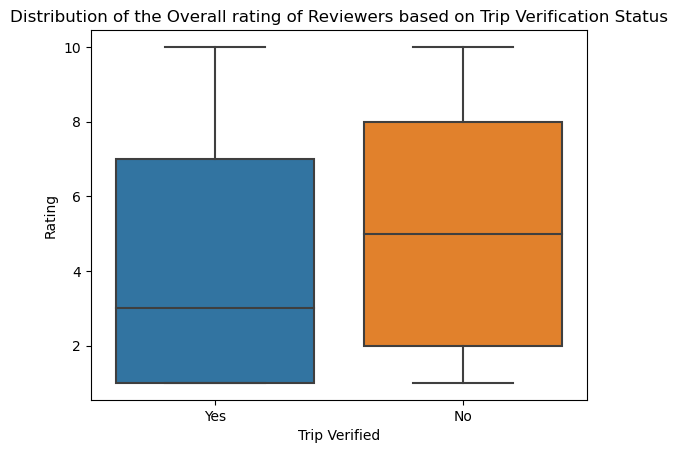

In [24]:
sns.boxplot(data = rate_df,y = 'Rating',x = 'Trip_Verified')
plt.xlabel('Trip Verified')
plt.title('Distribution of the Overall rating of Reviewers based on Trip Verification Status')
plt.savefig('rel.png')

### 7. What are the most frequent words used by customers in their reviews of British Airways?


In [25]:
#Converting all text to lower case.
master_df.Review = master_df.Review.apply(lambda x:x.lower())

In [26]:
#categorizing text
text = master_df.Review.str.cat(sep = ' ')

In [27]:
# Generate a word cloud from the given text
wordcloud = WordCloud(width=800, height=400).generate(text)

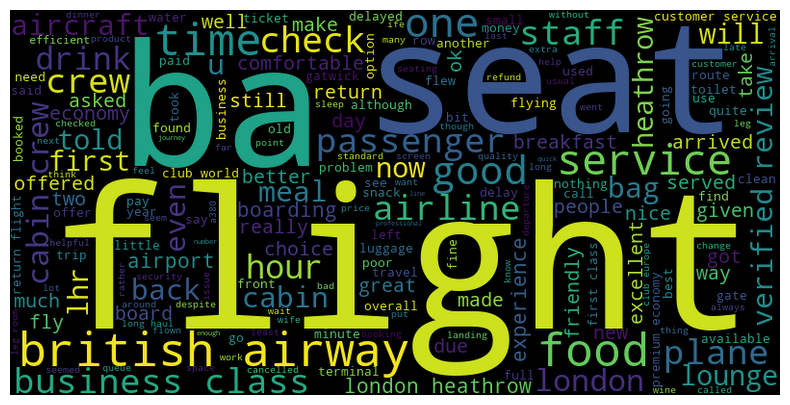

In [28]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()

## Sentiment Analysis

In [29]:
# Extract the column containing the text data
reviews = master_df["Review"]

# Perform sentiment analysis and group into positive, negative, and neutral
positive = []
negative = []
neutral = []

for text in reviews:
    blob = TextBlob(str(text))
    sentiment_score = blob.sentiment.polarity

    if sentiment_score > 0:
        positive.append(text)
    elif sentiment_score < 0:
        negative.append(text)
    else:
        neutral.append(text)

# Calculate the percentages
total_reviews = len(reviews)
percentage_positive = len(positive) / total_reviews * 100
percentage_negative = len(negative) / total_reviews * 100
percentage_neutral = len(neutral) / total_reviews * 100

# Print the percentages
print("Percentage of positive reviews: {:.2f}%".format(percentage_positive))
print("Percentage of negative reviews: {:.2f}%".format(percentage_negative))
print("Percentage of neutral reviews: {:.2f}%".format(percentage_neutral))


Percentage of positive reviews: 70.58%
Percentage of negative reviews: 29.03%
Percentage of neutral reviews: 0.39%


In [30]:
len(negative)

1041

In [31]:
total_reviews

3586

In [32]:
len(positive)

2531

In [33]:
len(neutral)

14

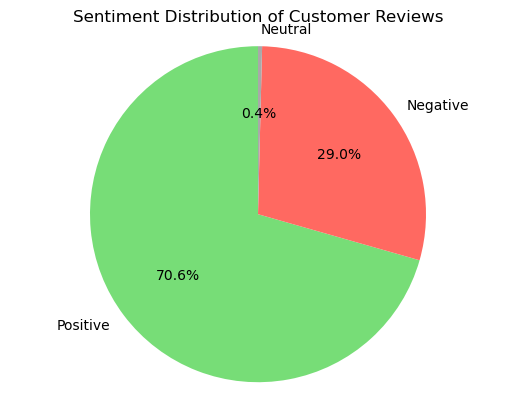

In [34]:
sentiment_name = ['Positive','Negative','Neutral']

# Plotting
labels = sentiment_name
sizes = [percentage_positive,percentage_negative,percentage_neutral]
colors = ['#77dd77', '#ff6961', '#a9a9a9']  # Green for positive, red for negative, gray for neutral

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Sentiment Distribution of Customer Reviews")
plt.savefig('sentiment.png')
plt.show()
